In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheetname = 'Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

In [4]:
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [5]:
df1 = pd.crosstab(df['koulutus'], 'lkm')
#muista aina otsikko esim lkm
df1.index = koulutus
df1.columns.name = ''
#nimeä indeksi ja ota toi col_0 pois nimeämmällä se tyhjäks
df1

,lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [6]:
#lisätään uusi sarake df1
df1['%'] = df1/df1.sum()
#muotoilaan prosentit, huom vain oikea indexi, käytä sanakirjaa siks vaikea
df1.style.format({'%':'{:.1%}'})
#huom älä laita df1 perää koska muotoilu ei tallennu!!

,lkm,%
Peruskoulu,27,33.3%
2. aste,30,37.0%
Korkeakoulu,22,27.2%
Ylempi korkeakoulu,2,2.5%


[Text(0,0,'0%'),
 Text(0,0,'5%'),
 Text(0,0,'10%'),
 Text(0,0,'15%'),
 Text(0,0,'20%'),
 Text(0,0,'25%'),
 Text(0,0,'30%'),
 Text(0,0,'35%'),
 Text(0,0,'40%')]

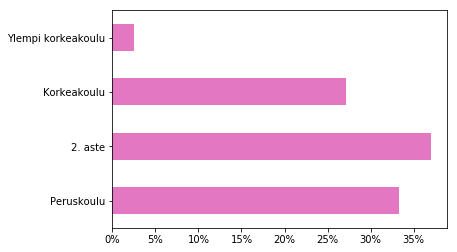

In [7]:
ax = df1['%'].plot.barh(color = 'C6')
#plottaus on grafiikkakomentoo
#barh viittaa pylväisiin ja color on väripaletti C0 on sinine
#nyt laittaa seuraavaks x-akseli kuntoon prosentit :D
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])
#0% jos ei haluu desimaalei

In [8]:
df2 = df[['työterv', 'lomaosa', 'kuntosa', 'hieroja']].count()
#lista haluaa ain omat hakasulut, count laskee lukuarvot
#count ei tuota dataframee tuloksena ni se pitää muuttaa
df2 = df2.to_frame('lkm').sort_values(by ='lkm', ascending=False)
df2

,lkm
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


Text(0.5,0,'Käyttäjien lukumäärä')

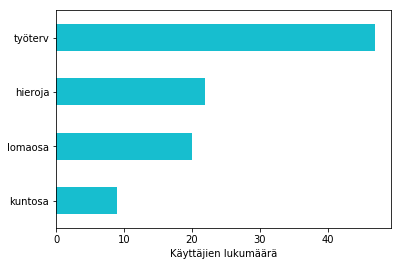

In [9]:
df2.sort_values(by='lkm').plot.barh(legend=False, color='C9')
#korjataan akselin nimi
plt.xlabel('Käyttäjien lukumäärä')

In [10]:
df3 = df.groupby('sukup')['työterv','lomaosa','kuntosa','hieroja'].count()
df3.index = sukup
#sit sukupuoli nimillä ni toi index
df3

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


Text(0.5,0,'Käyttäjien lukumäärä')

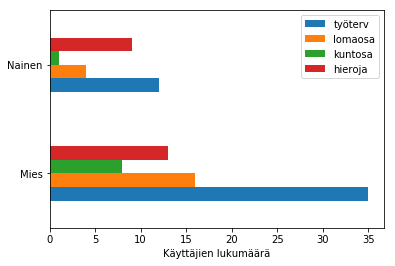

In [11]:
df3.plot.barh()
plt.xlabel('Käyttäjien lukumäärä')

In [12]:
dfn=df.groupby('sukup')['koulutus'].count()
dfn
#alkuvalmistelu crosstabille

sukup
1    62
2    19
Name: koulutus, dtype: int64

In [29]:
df4 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns')
#defaultina tulee lkm, sarakeprosentit tulee tol normalizel
df4.index = koulutus
#vähä korjattii visuaalista:
#eli index haki koulutusten nimet, 
mies = 'Mies (n='+str(dfn[1])+')'
nainen = 'Nainen (n='+str(dfn[2])+')'
#+ + tekee silleee et plussaa hipsujen sisäl olevan jutun ja sit sen matikan
#jollon se ei printtaa sitä itsenään

df4.columns = [mies, nainen]
#columns haki sp nimet
#style teki prosenteist nätit
df4.style.format('{:.1%}')
#style teki prosenteist nätit



,Mies (n=62),Nainen (n=19)
Peruskoulu,35.5%,26.3%
2. aste,37.1%,36.8%
Korkeakoulu,24.2%,36.8%
Ylempi korkeakoulu,3.2%,0.0%


In [ ]:
df5 = df['johto'].value_counts(sort=False, normalize = True).to_frame()
#value counts järkkää ne järjestykseen, mut ei haluta sorttaa niit siihe
#huom ei tuota data framea joten luodaan se to_framella
df5['työtov']=df['työtov'].value_counts(sort=False, normalize = True).to_frame()
df5['työymp']=df['työymp'].value_counts(sort=False, normalize = True).to_frame()
df5['palkkat']=df['palkkat'].value_counts(sort=False, normalize = True).to_frame()
df5['työteht']=df['työteht'].value_counts(sort=False, normalize = True).to_frame()
df5.index=tyytyväisyys
df5.style.format('{:.1%}')

In [15]:
ax = df5.transpose().plot.barh(stacked = True)
#transpose kääntää rivit ja sarakkeet päittäin
#stack laittaa ne yhtee putkee

NameError: name 'df5' is not defined

In [26]:
bins = [1000,2000,3000,4000,7000]
df['palkkaluokka'] = pd.cut(df['palkka'], bins=bins)
#bins=bins ite määritellyt luokkarajt
#bins=5 ni python määrittelee 5 luokkaan ite
df6 = pd.crosstab(df['palkkaluokka'], 'lkm')
df6.columns.name = ''
#columns tyhjää et ei tuu ruma osikko sinne
df6

,lkm
palkkaluokka,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 7000]",5


Text(0,0.5,'Lukumäärä')

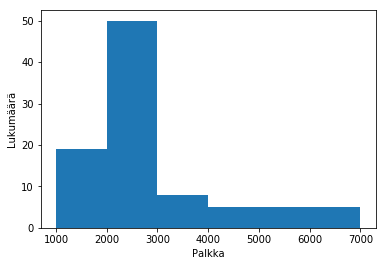

In [30]:
df['palkka'].plot.hist(bins)
plt.xlabel('Palkka')
plt.ylabel('Lukumäärä')
#hist on histogrammi kun barh on vaakapylväs